In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def remove_acks(panda):
    panda = panda[(panda['TCPport_dst'] == 445) | (panda['TCPport_dst'] == 139)]
    return panda 

In [3]:
def remove_treeID(panda, treeID):
    panda = panda[panda['TreeID'] != treeID]
    return panda

In [4]:
def remove_SessionID(panda, SessionID):
    panda = panda[panda['SessionID'] != SessionID]
    return panda

In [45]:
def read_from_txt(file_name):
    df = pd.read_csv(file_name, encoding = "ISO-8859-1",error_bad_lines=False , sep=" ",index_col=False)
    return df

In [6]:
def create_csv(panda, file_name):
    panda.to_csv(file_name, index=False)

In [81]:
def plot_freq_over_time(panda, SMBcommand, num_bins):
    plt.hist(x=panda.loc[panda['SMBcommand'] == SMBcommand].Timestamp.astype(float) , bins=num_bins)
    plt.show()

In [8]:
def pie_chart(panda):
    labels = '4', '5', '6', '7', '8','9', '10', '11', '12','13','14', '15', '16', '17'
    sizes = [len(panda.loc[panda['SMBcommand'] == 4]),
             len(panda.loc[panda['SMBcommand'] == 5]),
             len(panda.loc[panda['SMBcommand'] == 6]),
             len(panda.loc[panda['SMBcommand'] == 7]),
             len(panda.loc[panda['SMBcommand'] == 8]),
             len(panda.loc[panda['SMBcommand'] == 9]),
             len(panda.loc[panda['SMBcommand'] == 10]),
             len(panda.loc[panda['SMBcommand'] == 11]),
             len(panda.loc[panda['SMBcommand'] == 12]),
             len(panda.loc[panda['SMBcommand'] == 13]),
             len(panda.loc[panda['SMBcommand'] == 14]),
             len(panda.loc[panda['SMBcommand'] == 15]),
             len(panda.loc[panda['SMBcommand'] == 16]),
             len(panda.loc[panda['SMBcommand'] == 17])] 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

In [84]:
def stat_summary_of_command(panda, SMBcommand, final):
    interval_range = pd.interval_range(start=0, freq=5, end=final, closed='left')
    bucket= panda.loc[panda['SMBcommand'] == SMBcommand]
    bucket = pd.cut(bucket['Timestamp'].astype(float), bins=interval_range)
    print(bucket.value_counts().describe())
    fig1, ax1 = plt.subplots()
    ax1.set_title("Frequncy of call "+ str(SMBcommand))
    ax1.boxplot(bucket.value_counts())


In [10]:
def percentage_of_call(panda, SMBcommand):
    total = len(panda)
    SMB_total= len(panda.loc[panda['SMBcommand'] == SMBcommand])
    print("\nThis comamnd "+ str(SMBcommand))
    print("all calls "+ str(total))
    print("this call " +str(SMB_total))
    print("percentage "+str(SMB_total/total))

In [11]:
def show_all_percentage(panda):
    for x in range(0, 19):
        percentage_of_call(panda, x)

In [79]:
def return_five_max(panda):
    base = 5
    column = panda["Timestamp"].astype(float)
    a_number=column.max()
    nearest_multiple = base * math.ceil(a_number/base)
    return nearest_multiple

In [13]:
def show_analysis(panda, smb_num):
    final_time = return_five_max(panda)
    plot_freq_over_time(panda, smb_num, int(final_time/5))
    pie_chart(panda)
    stat_summary_of_command(panda, smb_num, final_time)

In [14]:
sopa = read_from_txt("full_io_files/Spora_17052017.txt")
sopa = remove_acks(sopa)
sopa = remove_treeID(sopa, 0)
sopa = remove_SessionID(sopa, 0)
sopa = remove_SessionID(sopa,4398046511145)
create_csv(sopa, "saved_csv/Spora_17052017.csv")

In [15]:
wanna = read_from_txt("full_io_files/wannaCry_16052017.txt")
wanna = remove_acks(wanna)
wanna = remove_treeID(wanna, 0)
wanna = remove_SessionID(wanna, 0)
create_csv(wanna, "saved_csv/wannaCry_16052017.csv")

In [16]:
revange =read_from_txt("full_io_files/revenge_15032018.txt")
revange = remove_acks(revange)
revange = remove_treeID(revange, 0)
revange = remove_SessionID(revange, 0)
revange = remove_SessionID(revange, 4398046511193)
create_csv(revange, "saved_csv/revenge_15032018.csv")

In [17]:
crptFile =read_from_txt("full_io_files/CryptFile2_10112016.txt")
crptFile = remove_acks(crptFile)
crptFile = remove_treeID(crptFile, 0)
crptFile = remove_SessionID(crptFile, 0)
create_csv(crptFile, "saved_csv/CryptFile2_10112016.csv")

In [18]:
GandCrab = read_from_txt("full_io_files/GandCrab_22052019.txt")
GandCrab = remove_acks(GandCrab)
GandCrab = remove_treeID(GandCrab, 0)
GandCrab = remove_SessionID(GandCrab,4398046511145)
GandCrab = remove_SessionID(GandCrab, 0)
create_csv(GandCrab, "saved_csv/GandCrab_22052019.csv")

In [19]:
GlobeImposter = read_from_txt("full_io_files/GlobeImposter_06052017.txt")
GlobeImposter = remove_acks(GlobeImposter)
GlobeImposter = remove_treeID(GlobeImposter, 0)
GlobeImposter = remove_SessionID(GlobeImposter,4398046511137)
GlobeImposter = remove_SessionID(GlobeImposter,4398046511141)
GlobeImposter = remove_SessionID(GlobeImposter, 0)
create_csv(GlobeImposter, "saved_csv/GlobeImposter_06052017.csv")

In [20]:
Jaff = read_from_txt("full_io_files/Jaff_13062017.txt")
Jaff = remove_acks(Jaff)
Jaff = remove_treeID(Jaff, 0)
Jaff = remove_SessionID(Jaff,4398046511197)
Jaff = remove_SessionID(Jaff,4398046511193)
Jaff = remove_SessionID(Jaff,4398046511189)
Jaff = remove_SessionID(Jaff,4398046511185)
Jaff = remove_SessionID(Jaff,4398046511181)
Jaff = remove_SessionID(Jaff, 0)
create_csv(Jaff, "saved_csv/Jaff_13062017.csv")

In [21]:
Locky = read_from_txt("full_io_files/Locky_27042016.txt")
Locky = remove_acks(Locky)
Locky = remove_treeID(Locky, 0)
Locky = remove_SessionID(Locky,4398046511113)
Locky = remove_SessionID(Locky, 0)
create_csv(Locky, "saved_csv/Locky_27042016.csv")

C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [22]:
maktub = read_from_txt("full_io_files/maktub_12042018.txt")
maktub = remove_acks(maktub)
maktub = remove_treeID(maktub, 0)
maktub = remove_SessionID(maktub, 0)
create_csv(maktub, "saved_csv/maktub_12042018.csv")

In [23]:
Maze = read_from_txt("full_io_files/Maze_16122019.txt")
Maze = remove_acks(Maze)
Maze = remove_treeID(Maze, 0)
Maze = remove_SessionID(Maze, 0)
create_csv(Maze, "saved_csv/Maze_16122019.csv")

In [24]:
Mole = read_from_txt("full_io_files/Mole_26052018.txt")
Mole = remove_acks(Mole)
Mole = remove_treeID(Mole, 0)
Mole = remove_SessionID(Mole, 0)
Mole = remove_SessionID(Mole, 4398046511113)
Mole = remove_SessionID(Mole, 4398046511137)
Mole = remove_SessionID(Mole, 4398046511141)
Mole = remove_SessionID(Mole, 4398046511145)
Mole = remove_SessionID(Mole, 4398046511149)
Mole = remove_SessionID(Mole, 4398046511153)
create_csv(Mole, "saved_csv/Mole_26052018.csv")

In [25]:
MRCR = read_from_txt("full_io_files/MRCR_15012017.txt")
MRCR = remove_acks(MRCR)
MRCR = remove_treeID(MRCR, 0)
MRCR = remove_SessionID(MRCR, 0)
create_csv(MRCR, "saved_csv/MRCR_15012017.csv")

In [35]:
RansomX = read_from_txt("full_io_files/RansomX_28062020.txt")
RansomX = remove_acks(RansomX)
RansomX = remove_treeID(RansomX, 0)
RansomX = remove_SessionID(RansomX, 0)
create_csv(RansomX, "saved_csv/RansomX_28062020.csv")

In [41]:
Razi = read_from_txt("full_io_files/Razi_15012021.txt")
Razi = remove_acks(Razi)
Razi = remove_treeID(Razi, 0)
Razi = remove_SessionID(Razi, 0)
create_csv(Razi, "saved_csv/Razi_15012021.csv")

In [48]:
Ryuk = read_from_txt("full_io_files/Ryuk_16042019.txt")
Ryuk = remove_acks(Ryuk)
Ryuk = remove_treeID(Ryuk, 0)
Ryuk = remove_SessionID(Ryuk, 0)
Ryuk = remove_SessionID(Ryuk, 107374182401)
create_csv(Ryuk, "saved_csv/Ryuk_16042019.csv")

b'Skipping line 103773: expected 20 fields, saw 21\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [53]:
Sage = read_from_txt("full_io_files/Sage_23012018.txt")
Sage = remove_acks(Sage)
Sage = remove_treeID(Sage, 0)
Sage = remove_SessionID(Sage, 0)
Sage = remove_SessionID(Sage, 4398046511145)
create_csv(Sage, "saved_csv/Sage_23012018.csv")

In [58]:
Scarab = read_from_txt("full_io_files/Scarab_18102019.txt")
Scarab = remove_acks(Scarab)
Scarab = remove_treeID(Scarab, 0)
Scarab = remove_SessionID(Scarab, 0)
create_csv(Scarab, "saved_csv/Scarab_18102019.csv")

In [62]:
Shade = read_from_txt("full_io_files/Shade_15112019.txt")
Shade = remove_acks(Shade)
Shade = remove_treeID(Shade, 0)
Shade = remove_SessionID(Shade, 0)
create_csv(Shade, "saved_csv/Shade_15112019.csv")

In [66]:
Shaofao = read_from_txt("full_io_files/Shaofao_20082020.txt")
Shaofao = remove_acks(Shaofao)
Shaofao = remove_treeID(Shaofao, 0)
Shaofao = remove_SessionID(Shaofao, 0)
create_csv(Shaofao, "saved_csv/Shaofao_20082020.csv")

b'Skipping line 107470: expected 20 fields, saw 21\n'
b'Skipping line 151990: expected 20 fields, saw 21\n'
b'Skipping line 164846: expected 20 fields, saw 21\nSkipping line 179063: expected 20 fields, saw 21\nSkipping line 194210: expected 20 fields, saw 21\n'
b'Skipping line 209724: expected 20 fields, saw 21\nSkipping line 225334: expected 20 fields, saw 21\n'
b'Skipping line 238326: expected 20 fields, saw 21\n'


In [72]:
Sodinokibi = read_from_txt("full_io_files/Sodinokibi_24032020.txt")
Sodinokibi = remove_acks(Sodinokibi)
Sodinokibi = remove_treeID(Sodinokibi, 0)
Sodinokibi = remove_SessionID(Sodinokibi, 0)
create_csv(Sodinokibi, "saved_csv/Sodinokibi_24032020.csv")

b'Skipping line 418952: expected 20 fields, saw 21\n'


In [77]:
Stop = read_from_txt("full_io_files/Stop_01022020.txt")
Stop = remove_acks(Stop)
Stop = remove_treeID(Stop, 0)
Stop = remove_SessionID(Stop, 0)
create_csv(Stop, "saved_csv/Stop_01022020.csv")

b'Skipping line 4950: expected 20 fields, saw 21\nSkipping line 12131: expected 20 fields, saw 21\nSkipping line 14940: expected 20 fields, saw 21\nSkipping line 18318: expected 20 fields, saw 21\nSkipping line 20803: expected 20 fields, saw 22\n'
b'Skipping line 115747: expected 20 fields, saw 21\n'
b'Skipping line 134579: expected 20 fields, saw 21\n'


In [91]:
TeslaCrypt = read_from_txt("full_io_files/TeslaCrypt_28122015.txt")
TeslaCrypt = remove_acks(TeslaCrypt)
TeslaCrypt = remove_treeID(TeslaCrypt, 0)
TeslaCrypt = remove_SessionID(TeslaCrypt, 0)
create_csv(TeslaCrypt, "saved_csv/TeslaCrypt_28122015.csv")

In [97]:
Virlock = read_from_txt("full_io_files/Virlock_16022017.txt")
Virlock = remove_acks(Virlock)
Virlock = remove_treeID(Virlock, 0)
Virlock = remove_SessionID(Virlock, 0)
create_csv(Virlock, "saved_csv/Virlock_16022017.csv")

In [102]:
Zeus = read_from_txt("full_io_files/Zeus_31102017.txt")
Zeus = remove_acks(Zeus)
Zeus = remove_treeID(Zeus, 0)
Zeus = remove_SessionID(Zeus, 0)
create_csv(Zeus, "saved_csv/Zeus_31102017.csv")

b'Skipping line 294680: expected 20 fields, saw 22\n'
C:\Users\christopher lewis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [109]:
Phobos = read_from_txt("full_io_files/Phobos_08052019.txt")
Phobos = remove_acks(Phobos)
#Phobos = remove_treeID(Phobos, 0)
#Phobos = remove_SessionID(Phobos, 0)
create_csv(Phobos, "saved_csv/Phobos_08052019.csv")

b'Skipping line 57938: expected 20 fields, saw 21\nSkipping line 64375: expected 20 fields, saw 21\n'
b'Skipping line 86598: expected 20 fields, saw 21\nSkipping line 91860: expected 20 fields, saw 24\nSkipping line 91861: expected 20 fields, saw 21\n'
b'Skipping line 102799: expected 20 fields, saw 22\nSkipping line 114956: expected 20 fields, saw 21\n'
b'Skipping line 162736: expected 20 fields, saw 21\n'
b'Skipping line 301966: expected 20 fields, saw 21\n'
b'Skipping line 338505: expected 20 fields, saw 21\nSkipping line 339352: expected 20 fields, saw 21\n'


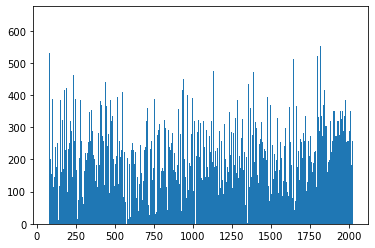

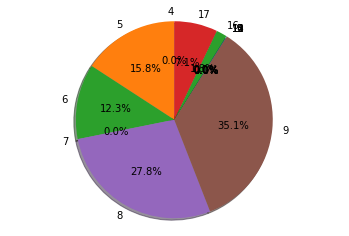

count    452.000000
mean     225.442478
std      139.653765
min        0.000000
25%      129.000000
50%      233.000000
75%      323.250000
max      644.000000
Name: Timestamp, dtype: float64


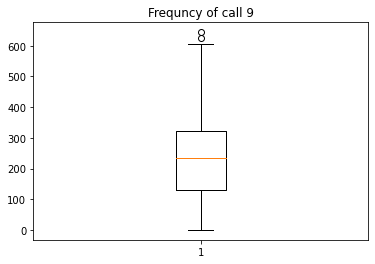

In [71]:
show_analysis(wanna, 9)

In [ ]:
show_analysis(sopa,9)

In [ ]:
show_analysis(revange,8)

In [ ]:
show_analysis(crptFile,8)

In [ ]:
show_analysis(GandCrab,8)

In [ ]:
show_analysis(GlobeImposter,8)

In [ ]:
show_analysis(Jaff,8)

In [ ]:
show_analysis(maktub,8)

In [ ]:
show_analysis(Maze,8)

In [ ]:
show_analysis(Mole,8)

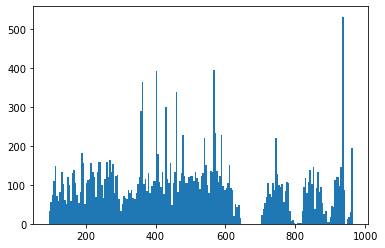

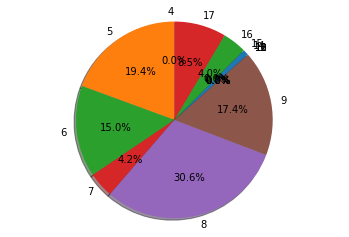

count    196.000000
mean      98.255102
std       88.507431
min        0.000000
25%       35.250000
50%      103.000000
75%      132.500000
max      592.000000
Name: Timestamp, dtype: float64


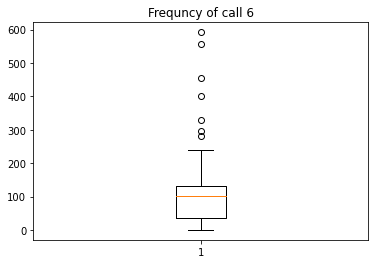

In [38]:
show_analysis(RansomX,6)

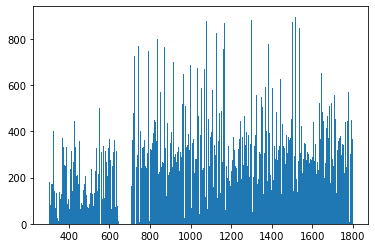

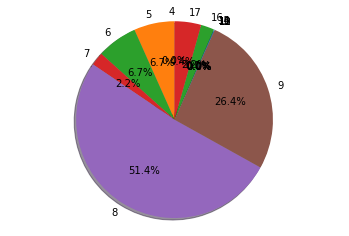

count     360.000000
mean      295.044444
std       224.507280
min         0.000000
25%       106.750000
50%       304.000000
75%       425.250000
max      1069.000000
Name: Timestamp, dtype: float64


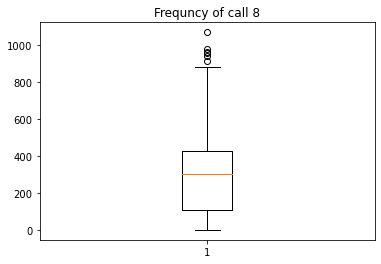

In [94]:
show_analysis(Razi,8)

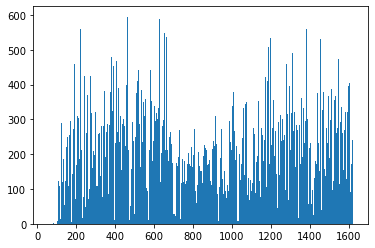

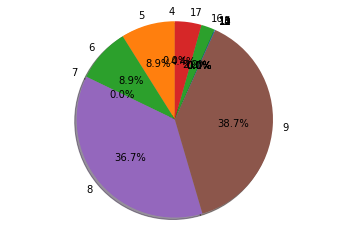

count    328.000000
mean     221.307927
std      141.423193
min        0.000000
25%      122.250000
50%      215.500000
75%      314.500000
max      636.000000
Name: Timestamp, dtype: float64


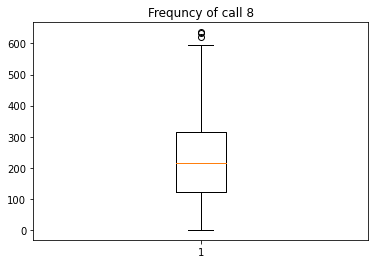

In [55]:
show_analysis(Sage, 8)

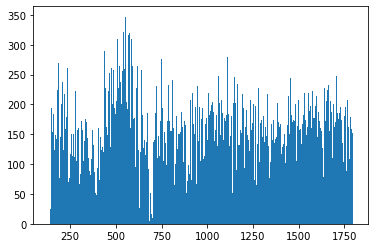

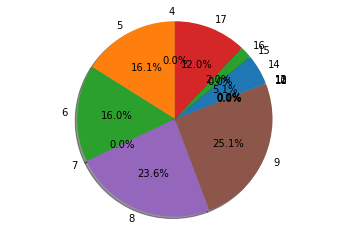

count    365.000000
mean     161.276712
std       74.176783
min        0.000000
25%      128.000000
50%      172.000000
75%      205.000000
max      395.000000
Name: Timestamp, dtype: float64


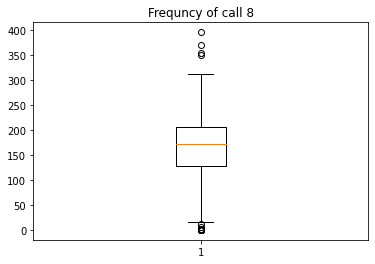

In [88]:
show_analysis(Scarab, 8)

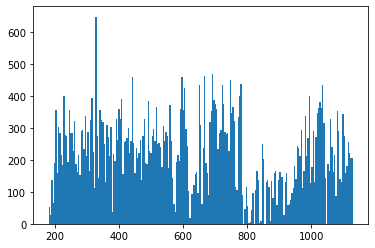

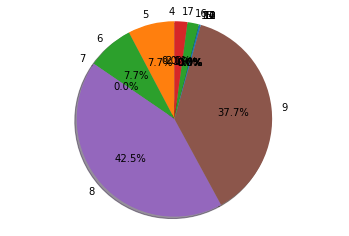

count    227.000000
mean     224.616740
std      156.194649
min        0.000000
25%       97.500000
50%      224.000000
75%      335.000000
max      575.000000
Name: Timestamp, dtype: float64


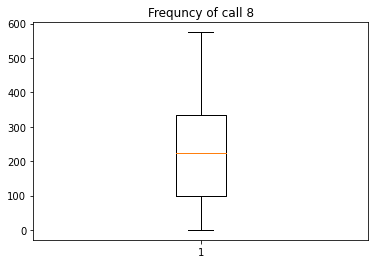

In [87]:
show_analysis(Shade, 8)

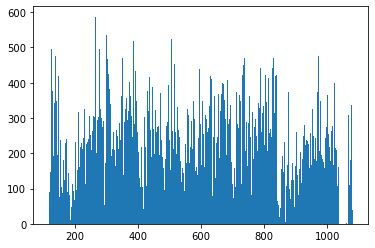

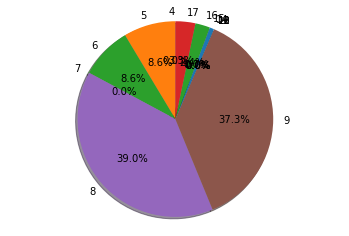

count     343.000000
mean      240.956268
std       254.347234
min         0.000000
25%         0.000000
50%       214.000000
75%       455.500000
max      1001.000000
Name: Timestamp, dtype: float64


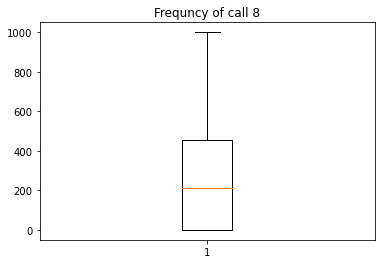

In [86]:
show_analysis(Sodinokibi,8)

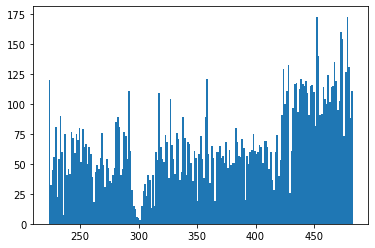

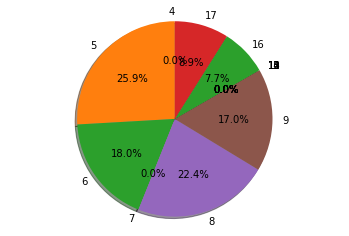

count    191.000000
mean      68.062827
std      122.311235
min        0.000000
25%        0.000000
50%        0.000000
75%      130.000000
max      465.000000
Name: Timestamp, dtype: float64


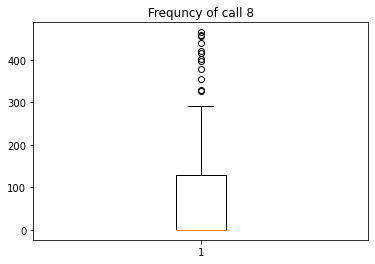

In [85]:
show_analysis(Stop,8)

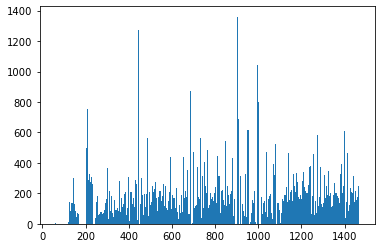

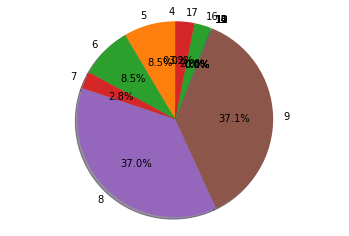

count     294.000000
mean      189.125850
std       196.834144
min         0.000000
25%        80.000000
50%       160.500000
75%       242.000000
max      1762.000000
Name: Timestamp, dtype: float64


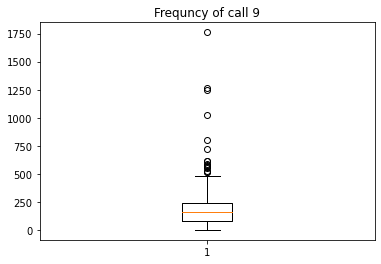

In [93]:
show_analysis(TeslaCrypt,9)

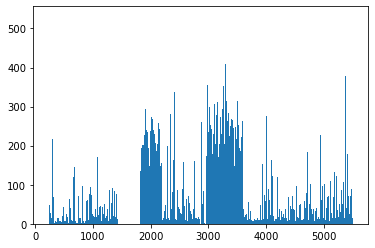

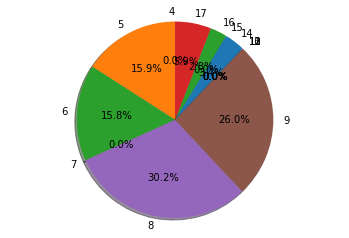

count    1102.000000
mean       79.219601
std        99.819114
min         0.000000
25%        11.000000
50%        29.000000
75%       112.000000
max       464.000000
Name: Timestamp, dtype: float64


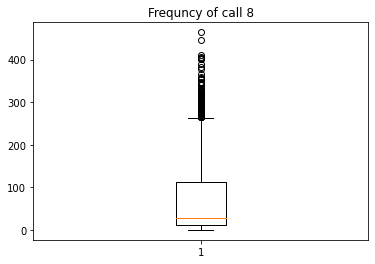

In [99]:
show_analysis(Virlock,8)

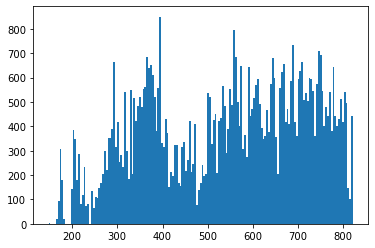

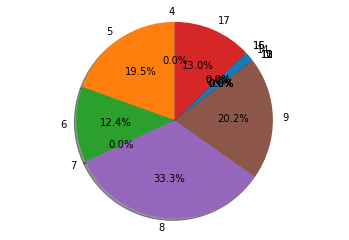

count    165.000000
mean     376.872727
std      273.878604
min        0.000000
25%       91.000000
50%      403.000000
75%      579.000000
max      972.000000
Name: Timestamp, dtype: float64


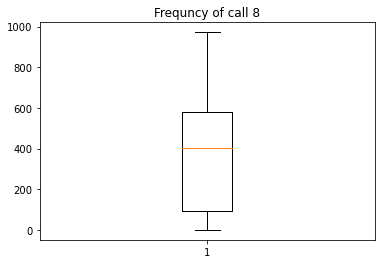

In [103]:
show_analysis(Zeus,8)